**Brian Blaylock**  
*April 23, 2021*

# Plot Vapor Pressure Deficit

In [1]:
from toolbox.cartopy_tools import common_features, pc
from toolbox.pressure import vapor_pressure_deficit
from herbie.archive import Herbie

In [2]:
ds = Herbie('2021-04-23').xarray('(TMP|RH):2 m')

/p/home/blaylock/BB_python/Herbie/herbie/archive.py:286: UserWarning: `product` not specified. Will use ["sfc"].
  warnings.warn(f'`product` not specified. Will use ["{self.product}"].')


🏋🏻‍♂️ Found 2021-Apr-23 00:00 UTC F00 [HRRR] [product=sfc] GRIB2 file from aws and index file from aws.                                                                                                                                                       


/p/home/blaylock/BB_python/Herbie/herbie/archive.py:696: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


📇 Download subset: [HRRR] model [sfc] product run at 2021-Apr-23 00:00 UTC F00                                                            
 cURL from https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20210423/conus/hrrr.t00z.wrfsfcf00.grib2
   1: GRIB_message=71  :TMP:2 m above ground:anl
   2: GRIB_message=75  :RH:2 m above ground:anl


In [3]:
vpd = vapor_pressure_deficit(ds['t2m']-273.15, ds['r2'])

crs = ds.herbie.crs

/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


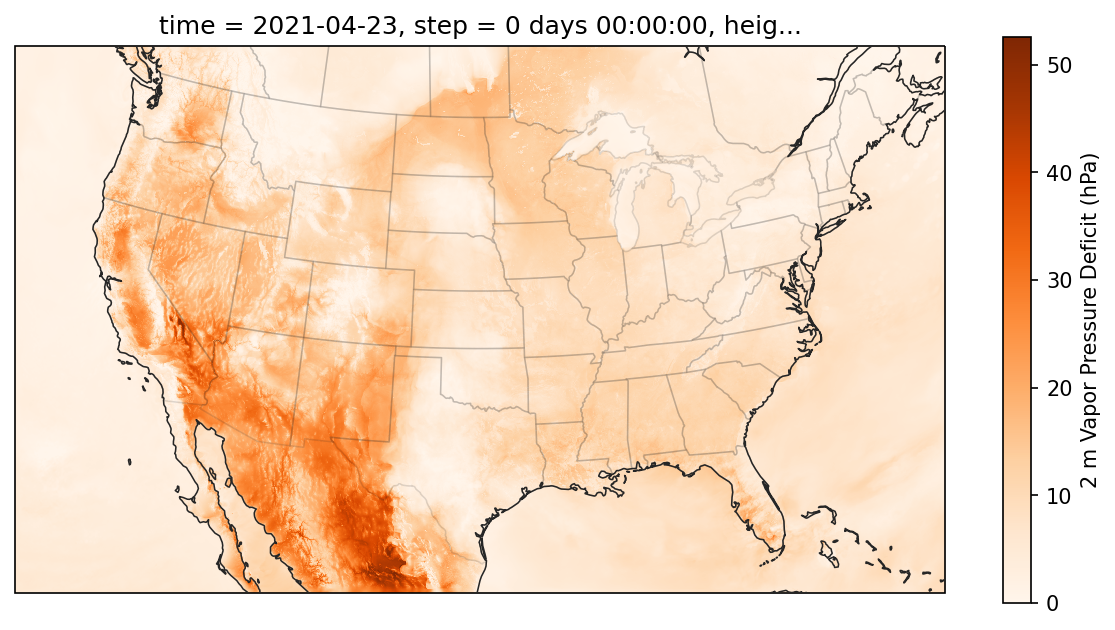

In [4]:
ax = common_features('50m', crs=crs, figsize=[10,5], dpi=150).STATES().ax
vpd.plot.pcolormesh(x='longitude', y='latitude', 
                    transform=pc, cmap='Oranges', 
                    ax=ax, 
                    cbar_kwargs=dict(label='2 m Vapor Pressure Deficit (hPa)'))